# $$Assignment-4$$

In [1]:
'''Importig libraries'''

import numpy as np
import matplotlib.pyplot as plt
import cmath
import warnings
warnings.filterwarnings('ignore')
import scipy.linalg as lin
from scipy.signal import residuez


plt.rcParams['figure.figsize']=(17,7)
cl = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

<a id = 1a></a>

## 1a)

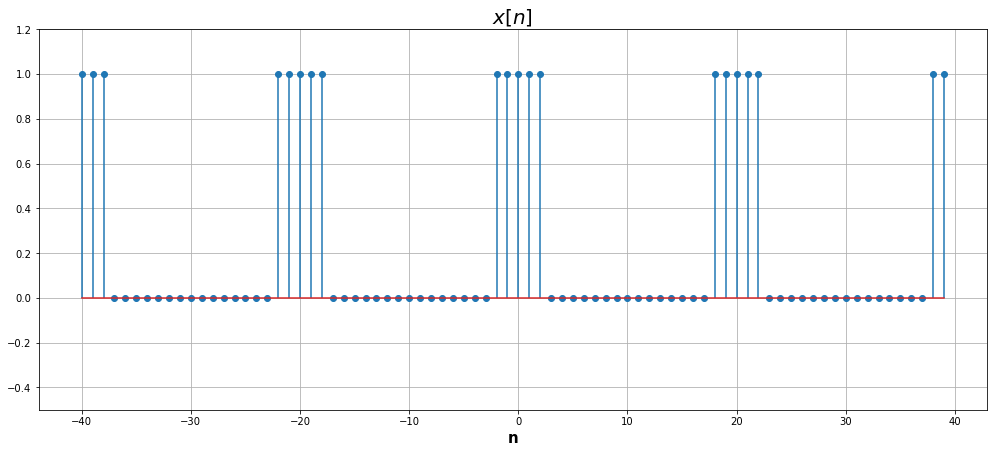

In [2]:
n_1 = np.arange(-40,40)
x_1 = 1 * (np.abs(n_1) % 20 <= 2) | (np.abs(n_1) % 20 >= 18)


plt.stem(n_1 , x_1)
plt.ylim(-0.5,1.2)
plt.grid()
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$x[n]$' , size = 20 , weight = 'extra bold')
plt.show()

## 1b)

In [3]:
'''  DTFS Function '''

def DTFS(x , shift = True):
    
    if shift:
        dtfs = (1/len(x)) * np.fft.fftshift(np.fft.fft(x))
    else:
        dtfs = (1/len(x)) * np.fft.fft(x)
        
    mag = np.abs(dtfs)
    phs = np.arctan2(np.imag(dtfs) , np.real(dtfs))
    
    return (dtfs,mag,phs)


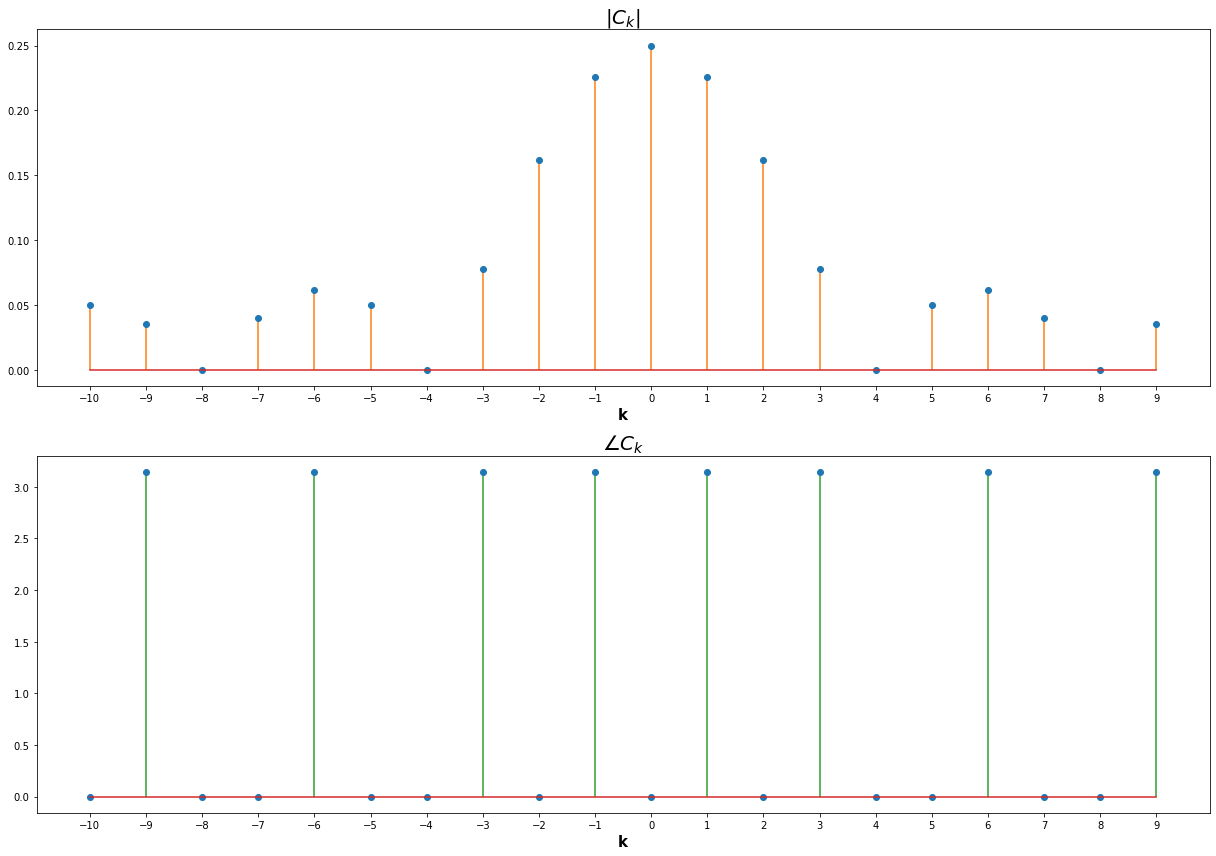

In [4]:

n_1_onecycle = np.arange(-10,10)
x_1_onecycle = 1 * (np.abs(n_1_onecycle) % 20 <= 2) | (np.abs(n_1_onecycle) % 20 >= 18)

x_1_dtfs,x_1_dtfs_mag , x_1_dtfs_phs = DTFS(x_1_onecycle )


fig , ax = plt.subplots(2,1 )
fig.set_size_inches(17,12)

ax[0].stem(n_1_onecycle, x_1_dtfs_mag,cl[1])
ax[0].set_xticks(n_1_onecycle)
ax[0].set_xlabel('k' , size = 15 , weight = 'bold')
ax[0].set_title('$|C_k|$' , size = 20 , weight = 'extra bold')

ax[1].stem(n_1_onecycle, x_1_dtfs_phs,cl[2])
ax[1].set_xticks(n_1_onecycle)
ax[1].set_xlabel('k' , size = 15 , weight = 'bold')
ax[1].set_title(r'$\angle C_k$' , size = 20 , weight = 'extra bold')

plt.tight_layout()
plt.show()

## 2a)

## $$ \hat x[n] = \sum_{k=-M}^{M} C_{k}e^{jk(2\pi/N)n} $$

In [5]:
'''Function to Reconstruct orginal Signal'''

def reconstruct_x(dtfs,M,rng = np.arange(-10,10)):
    
    N = len(dtfs)
    x = np.zeros(N,dtype = np.complex)
    K = np.where(np.abs(rng) <= M)
    
    
    for n in  rng:
        
        for f in K[0]:
            
            x[np.where(rng == n)] = x[np.where(rng == n)] + (dtfs[f] * cmath.exp(rng[f]* n * 2 * 1j * np.pi/N))
            
    return np.fft.fftshift(x)
        

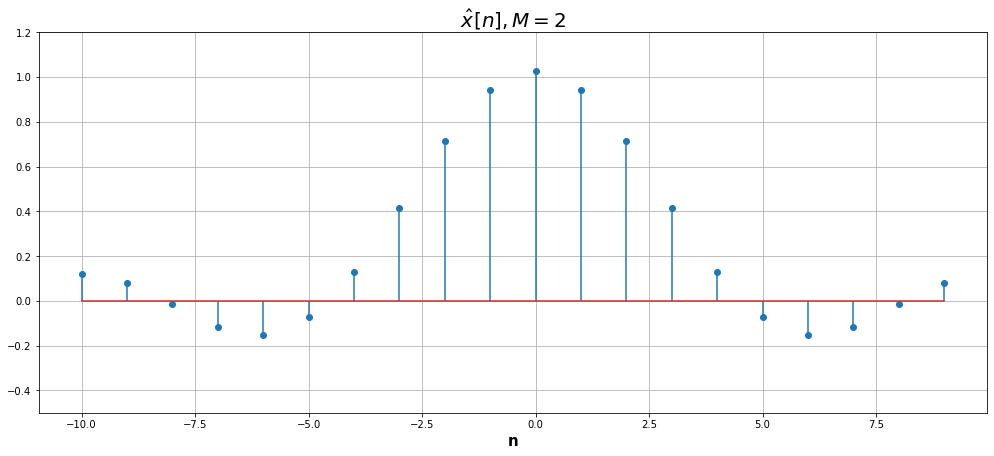

In [6]:
x_recon_2 = reconstruct_x(x_1_dtfs,2)

plt.stem(n_1_onecycle , x_recon_2)
plt.ylim(-0.5,1.2)
plt.grid()
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$\hat x[n] ,  M = 2$' , size = 20 , weight = 'extra bold')
plt.show()

## 2b)

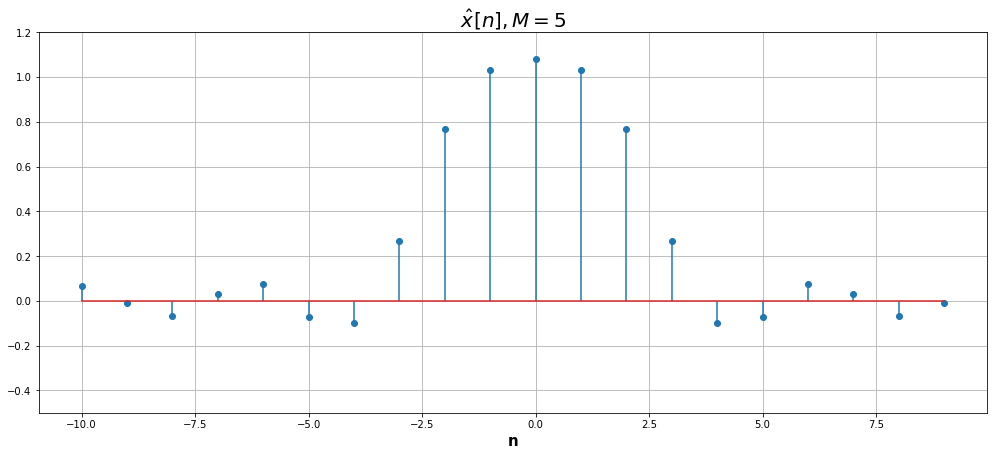

In [7]:
x_recon_5 = reconstruct_x(x_1_dtfs,5)

plt.stem(n_1_onecycle , x_recon_5)
plt.ylim(-0.5,1.2)
plt.grid()
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$\hat x[n] ,  M = 5$' , size = 20 , weight = 'extra bold')
plt.show()

## 3)

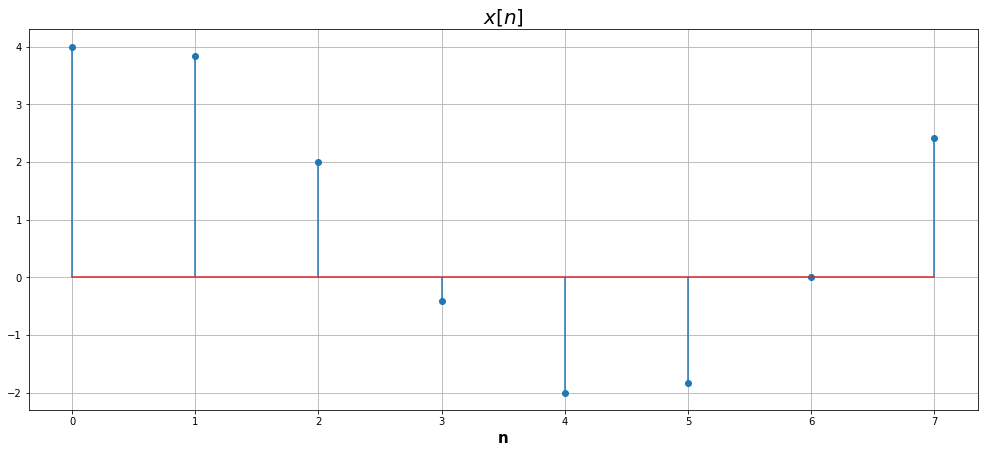

In [8]:
N_3 = 8
n_3 = np.arange(N_3)

x_3 = 1 + np.sin(2*np.pi*n_3/N_3) +  3 * np.cos(2*np.pi*n_3/N_3)

plt.stem(n_3 , x_3)
plt.grid()
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$x[n]$' , size = 20 , weight = 'extra bold')
plt.show()

In [9]:
x_3_power = (1/N_3) * np.power(x_3,2).sum()
print(f'Power of the signal = {x_3_power}')

Power of the signal = 6.0


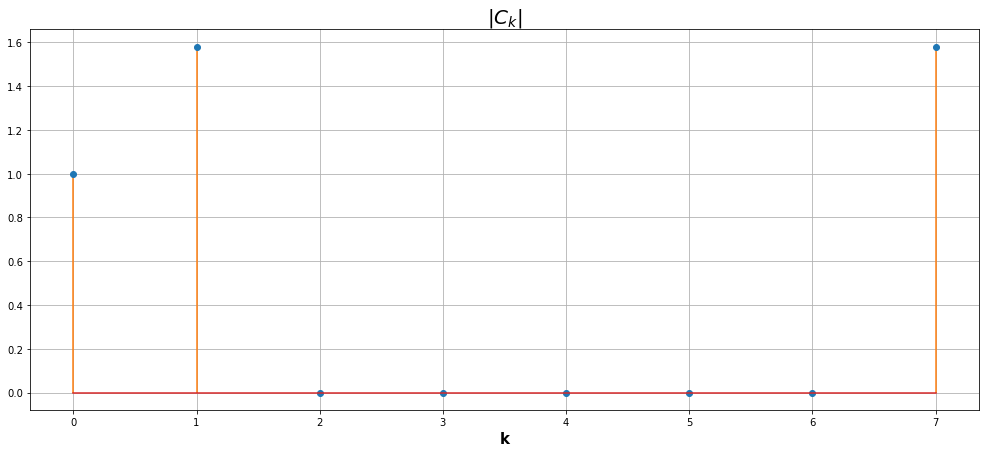

In [10]:
x_3_dtfs_mag = DTFS(x_3,False)[1]

plt.stem(n_3,x_3_dtfs_mag,cl[1])
plt.xlabel('k' , size = 15 , weight = 'bold')
plt.title('$|C_k|$' , size = 20 , weight = 'extra bold')
plt.grid()
plt.show()

In [11]:
x_3_dtfs_power = np.power(x_3_dtfs_mag,2).sum()
print(f'Power of the signal calculated using Parseval’s theorem = {x_3_dtfs_power}')

Power of the signal calculated using Parseval’s theorem = 6.0


<a id = 4></a>

## 4)

In [12]:
def DTFT(x , omg):
    
    dtft = np.zeros(len(omg),dtype = np.complex)
    
    for i in range(len(omg)):
    
        tmp = np.complex()
    
        for k in range(len(x)):
        
            tmp += (np.complex(x[k]) * cmath.exp(-1j*omg[i]*k))
        
        dtft[i] = tmp
        
    return dtft

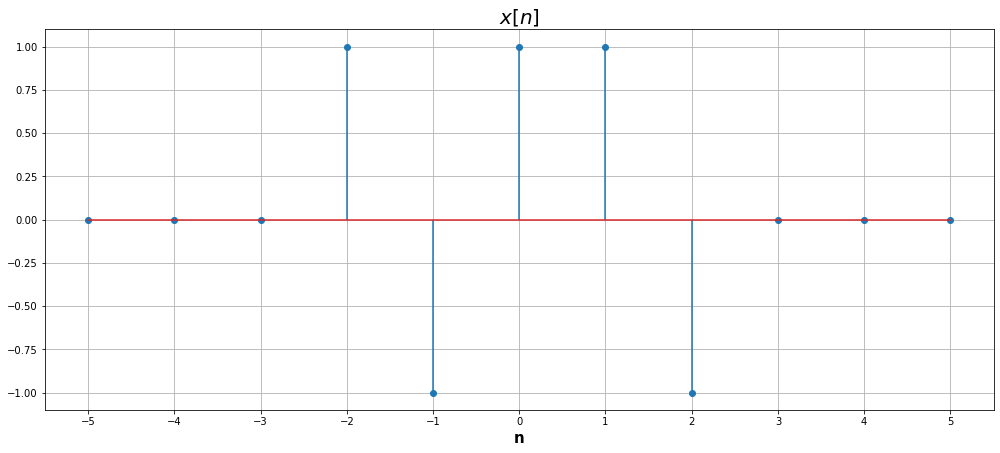

In [13]:
n_4 = np.arange(-5,6)
x_4 = [0,0,0,1,-1,1,1,-1,0,0,0]

plt.stem(n_4,x_4,)
plt.grid()
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$x[n]$' , size = 20 , weight = 'extra bold')
plt.xticks(n_4)
plt.show()

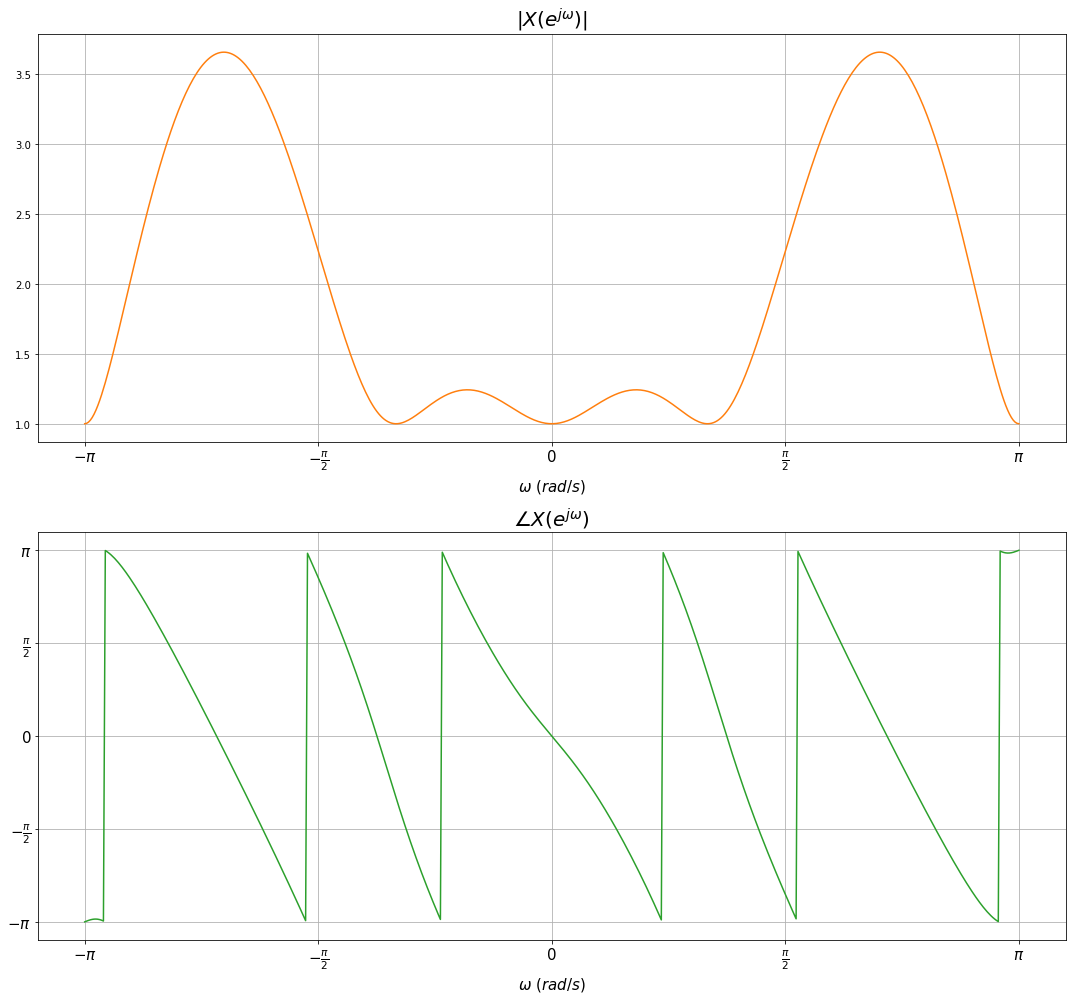

In [14]:
omg_4 = np.linspace(-np.pi , np.pi , 500)
x_4_dtft = DTFT(x_4 , omg_4 )

x_4_dtft_mag = np.abs(x_4_dtft)
x_4_dtft_phs = np.arctan2(np.imag(x_4_dtft) , np.real(x_4_dtft))

plt.figure(figsize=(15,14))
plt.subplot(211)
plt.plot(omg_4 , x_4_dtft_mag, cl[1])
plt.title(r'$\|X(e^{j\omega})|$' , size= 20,weight = 'extra bold')
plt.xlabel('$\omega\ (rad/s)$' , size = 15 , weight = 'bold')
plt.grid()
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)

plt.subplot(212)
plt.plot(omg_4 , x_4_dtft_phs, cl[2])
plt.title(r'$\angle X(e^{j\omega})$' , size= 20,weight = 'extra bold')
plt.xlabel('$\omega\ (rad/s)$' , size = 15 , weight = 'bold')
plt.grid()
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.yticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)

plt.tight_layout()
plt.show()

## 5)

Text(0.5, 1.0, '$h[n]$')

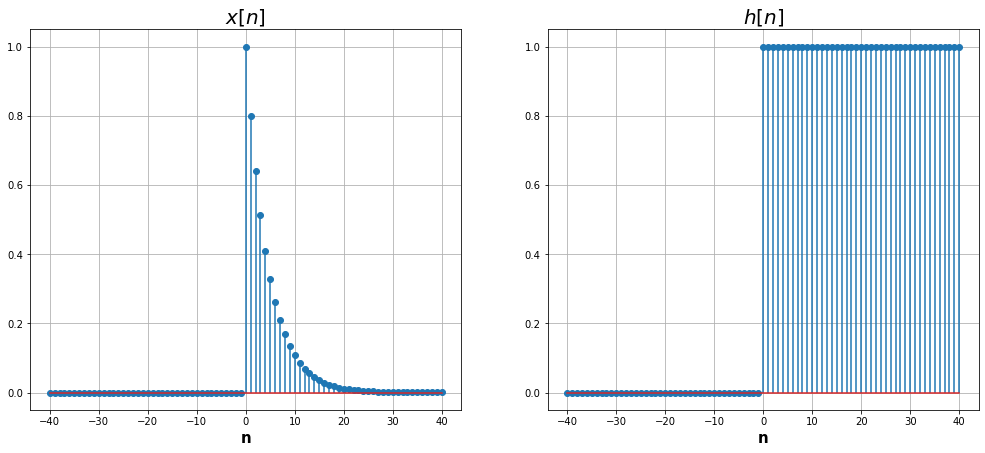

In [15]:
n_5 = np.arange(-40,41)

h_5 = 1*(n_5 >= 0)
x_5 = np.power(0.8,n_5)*h_5

plt.subplot(121)
plt.stem(n_5,x_5)
plt.grid()
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$x[n]$' , size = 20 , weight = 'extra bold')

plt.subplot(122)
plt.stem(n_5,h_5)
plt.grid()
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$h[n]$' , size = 20 , weight = 'extra bold')



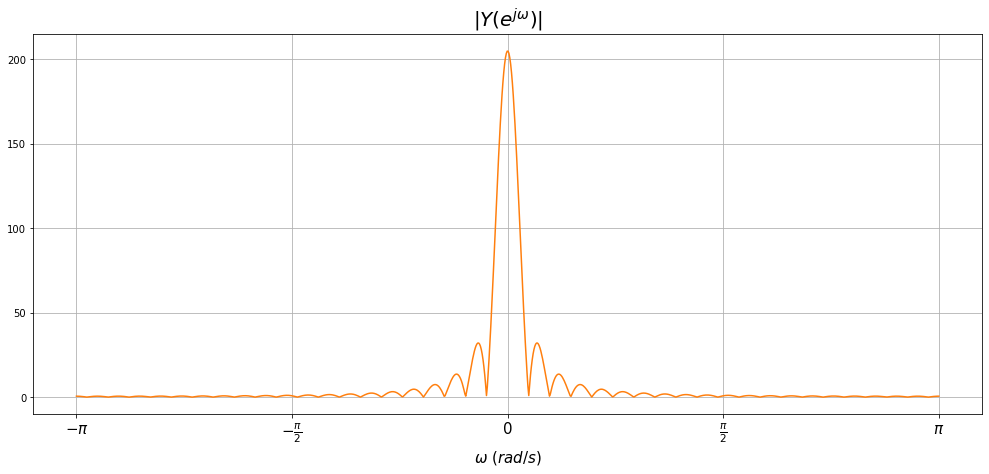

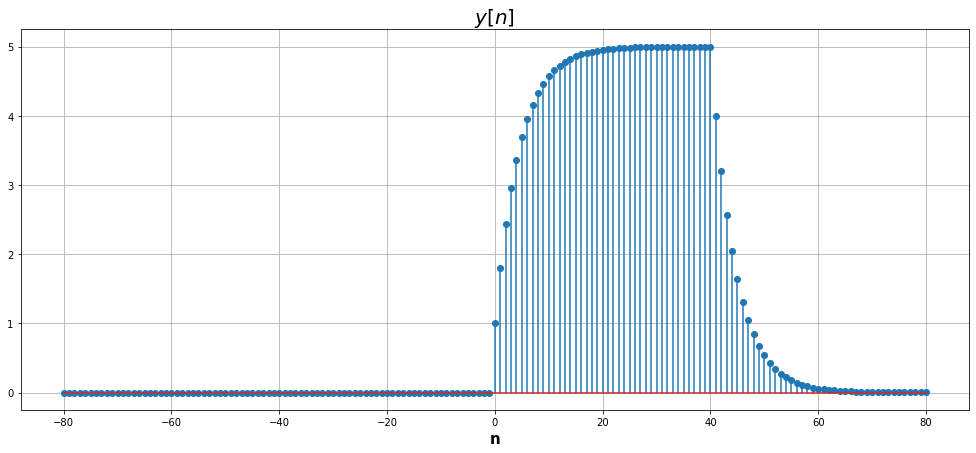

In [16]:
omg_5 = np.linspace(-np.pi,np.pi,1000)

x_5_dtft = DTFT(x_5,omg_5)
h_5_dtft = DTFT(h_5 , omg_5)

y_5_dtft = x_5_dtft * h_5_dtft

plt.plot(omg_5 , np.abs(y_5_dtft), cl[1])
plt.title(r'$\|Y(e^{j\omega})|$' , size= 20,weight = 'extra bold')
plt.xlabel('$\omega\ (rad/s)$' , size = 15 , weight = 'bold')
plt.grid()
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.show()

y_5 = np.convolve(x_5 ,h_5)



plt.stem(np.arange(-80,81),y_5)
plt.grid()
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$y[n]$' , size = 20 , weight = 'extra bold')
plt.show()



## 6)

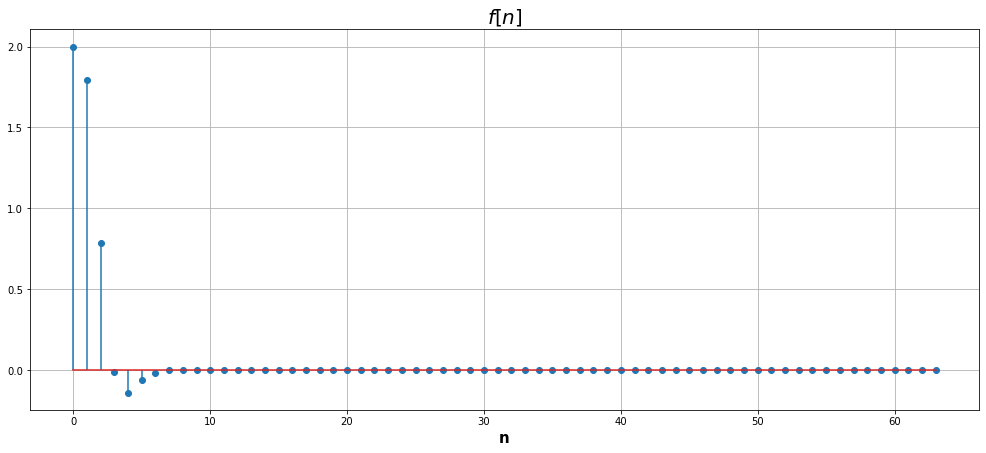

In [17]:
n_6 = np.arange(64)

f_6 = np.exp(-1*(n_6**2)/10) * (np.sin(2*n_6/(2*np.pi))  + 2*np.cos(4*n_6/(2*np.pi)) + 0.4*np.sin(1*n_6/(2*np.pi))*np.sin(10*n_6/(2*np.pi)))

plt.stem(n_6,f_6) 
plt.grid()
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$f[n]$' , size = 20 , weight = 'extra bold')
plt.show()


In [45]:
'''Function for DFT Matrix'''
def dftMtx(N):
    
    n_rng = np.arange(N)
    mtx = np.zeros((N,N) , dtype = np.complex)
    
    w = np.exp(-1j * n_rng * 2 * np.pi/N)
     
    for i in range(N):
        mtx[i , :] = np.power(w , i)    
        
    return mtx


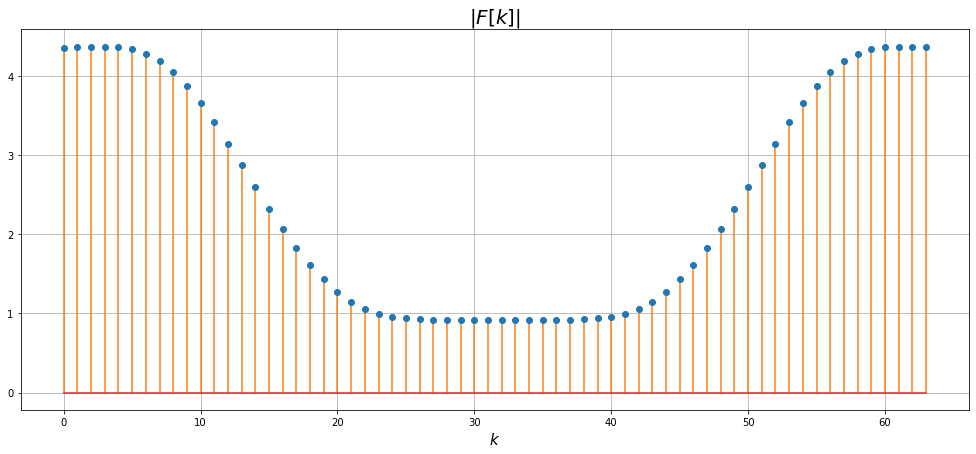

In [46]:

dft_mtx = dftMtx(64)

f_6_dft = np.dot(dft_mtx , f_6)

plt.stem(n_6,np.abs(f_6_dft) , cl[1])
plt.title(r'$\|F[k]|$' , size= 20,weight = 'extra bold')
plt.xlabel('$k$' , size = 15 , weight = 'bold')
plt.grid()
plt.show()


## 7a)

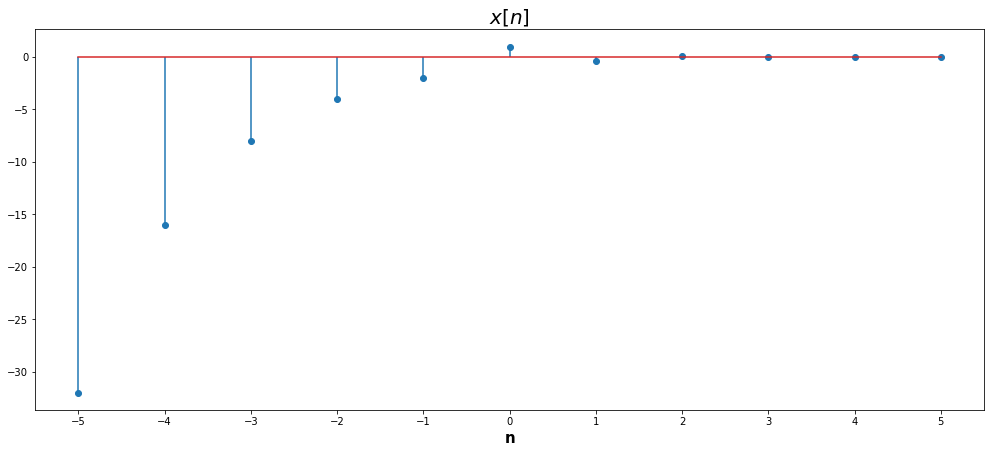

In [19]:
n_7 = np.arange(-5,6)

x_7 = np.power(-1/3 , n_7*(n_7 >= 0))*(n_7 >= 0) - np.power(1/2 , n_7*(n_7 < 0))*(n_7 < 0)

plt.stem(n_7 , x_7)
plt.xlabel('n' , size = 15 , weight = 'bold')
plt.title('$x[n]$' , size = 20 , weight = 'extra bold')
plt.xticks(n_7)
plt.show()



## Z-Transform of given signal:
## $$\frac{2 - \frac{1}{6}z^{-1}}{(1+\frac{1}{3}z^{-1})(1-\frac{1}{2}z^{-1})};\ ROC:\ \frac{1}{3}<|z|<\frac{1}{2}$$

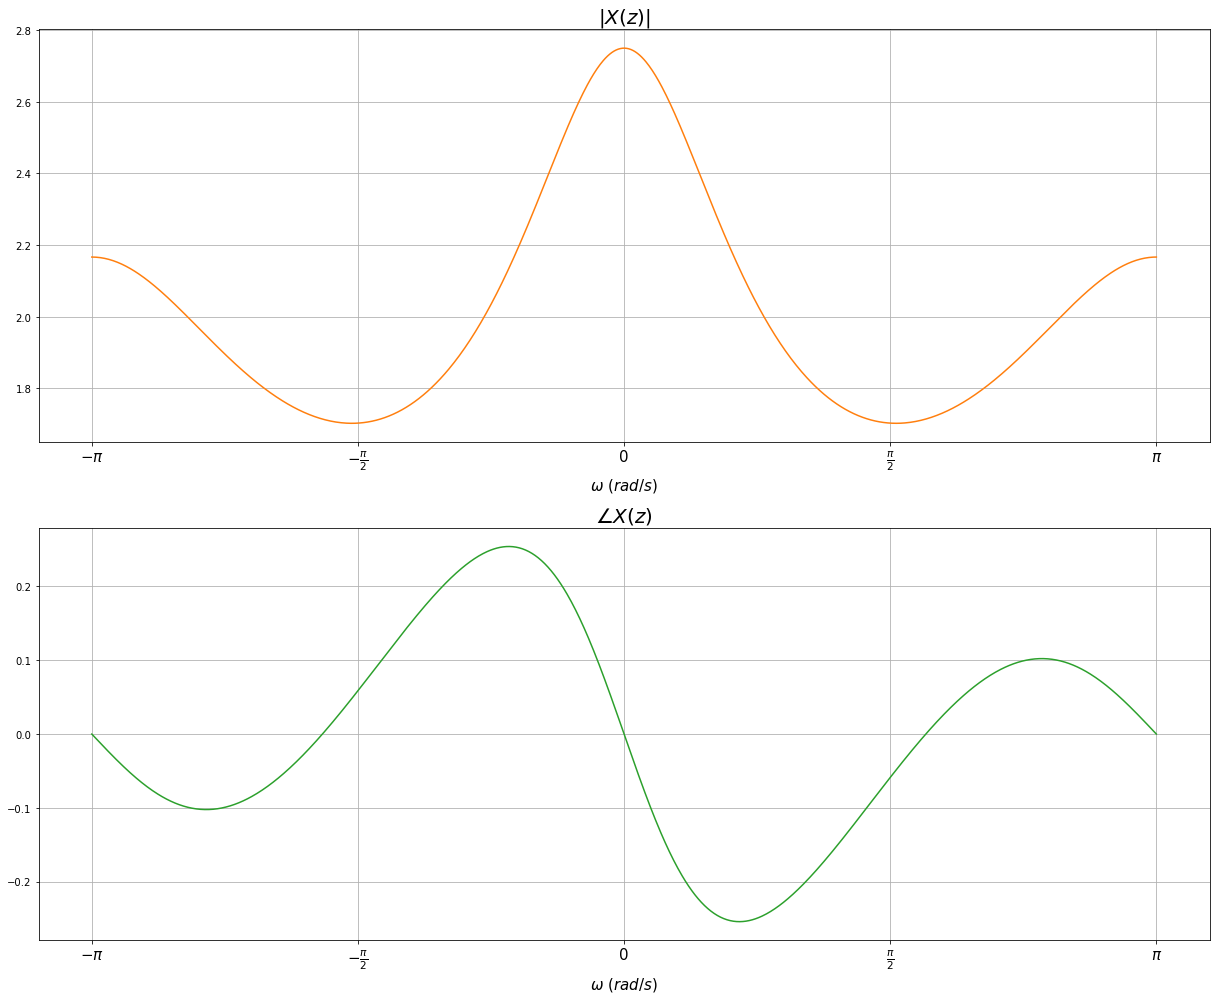

In [31]:
omg_7 = np.linspace(-np.pi , np.pi , 1000)

z_7 = (2 - (1/6)*np.exp(-1j * omg_7)) / ((1+(1/3)*np.exp(-1j * omg_7)) * (1-(1/2)*np.exp(-1j * omg_7)) )

z_7_mag = np.abs(z_7)
z_7_phs = np.arctan2(np.imag(z_7) , np.real(z_7))


plt.figure(figsize=(17,14))

plt.subplot(211)

plt.plot(omg_7 , z_7_mag, cl[1])
plt.title(r'$\|X(z)|$' , size= 20,weight = 'extra bold')
plt.xlabel('$\omega\ (rad/s)$' , size = 15 , weight = 'bold')
plt.grid()
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)


plt.subplot(212)

plt.plot(omg_7 , z_7_phs, cl[2])
plt.title(r'$\angle X(z)$' , size= 20,weight = 'extra bold')
plt.xlabel('$\omega\ (rad/s)$' , size = 15 , weight = 'bold')
plt.grid()
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)

plt.tight_layout()
plt.show()

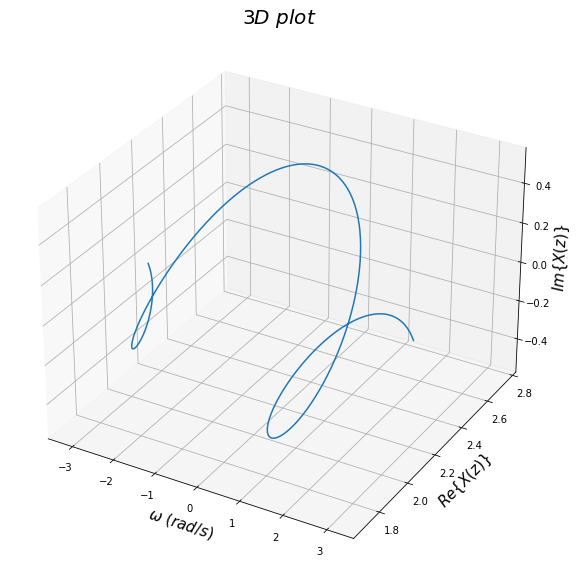

In [52]:
fig = plt.figure()
fig.set_size_inches(10,10)

ax_7 = plt.axes(projection = '3d' )


ax_7.plot3D(  omg_7 , z_7.real , z_7.imag ,)

ax_7.set_xlabel('$\omega\ (rad/s)$' , size = 15 , weight = 'bold')
ax_7.set_ylabel('$Re\{X(z)\}$' , size = 15 , weight = 'bold')
ax_7.set_zlabel('$Im\{X(z)\}$' , size = 15 , weight = 'bold')

plt.title(r'$3D\ plot$' , size= 20,weight = 'extra bold')
plt.show()

## 7b)

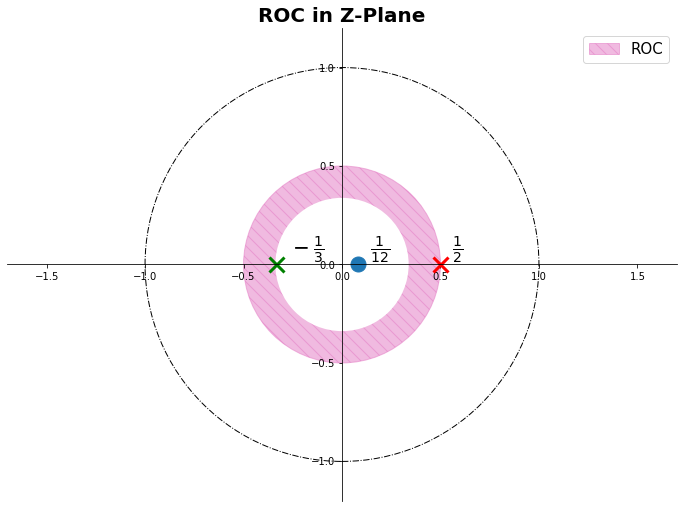

In [22]:
figure, axes = plt.subplots()
figure.set_size_inches(12,12)



unit_circ = plt.Circle( (0, 0 ),1 ,fill = False ,ls = '-.' ,)

zero_circ = plt.Circle( (0, 0 ),1/12 ,fill = False ,ls = '--')

pole_circ_1 = plt.Circle( (0, 0 ),1/3 ,fill = True ,  color = 'white'  , lw = 2)
pole_circ_2 = plt.Circle( (0, 0 ),1/2 ,fill = True ,hatch = r'\\ ',color = cl[6] , alpha = 0.5  )
                                                                            
axes.set_aspect( 1 )

axes.add_artist(pole_circ_2 )
axes.add_artist(unit_circ)
axes.add_artist(pole_circ_1)

z1 = plt.plot(1/12 , 0 , 'o' , ms = 15 , label = r'$Zero =\frac{1}{12}$ ')
p1 = plt.plot(-1/3 , 0 , 'gx' ,mew = 3, ms = 15,label = r'$Pole =-\frac{1}{3}$ ')
p2 = plt.plot(1/2 , 0 , 'rx' ,mew = 3, ms = 15,label = r'$Pole =\frac{1}{2}$ ')

plt.title( 'ROC in Z-Plane' , size= 20,weight = 'extra bold')
plt.xlim(-1.7,1.7)
plt.ylim(-1.2,1.2)

plt.text(1/12 , 0 , r'$\ \ \frac{1}{12}$' , size = 20 , va = 'bottom')
plt.text(-1/3 , 0 , r'$\ \ -\frac{1}{3}$ ' , size = 20 , va = 'bottom')
plt.text(1/2 , 0 , r'$\ \ \frac{1}{2}$' , size = 20 , va = 'bottom')

plt.legend(  prop = {'size':15})
axes.legend([pole_circ_2] , ['ROC' ] , prop = {'size':15})

axes.spines['left'].set_position('center')
axes.spines['bottom'].set_position('center')
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

plt.show()



## 8a)


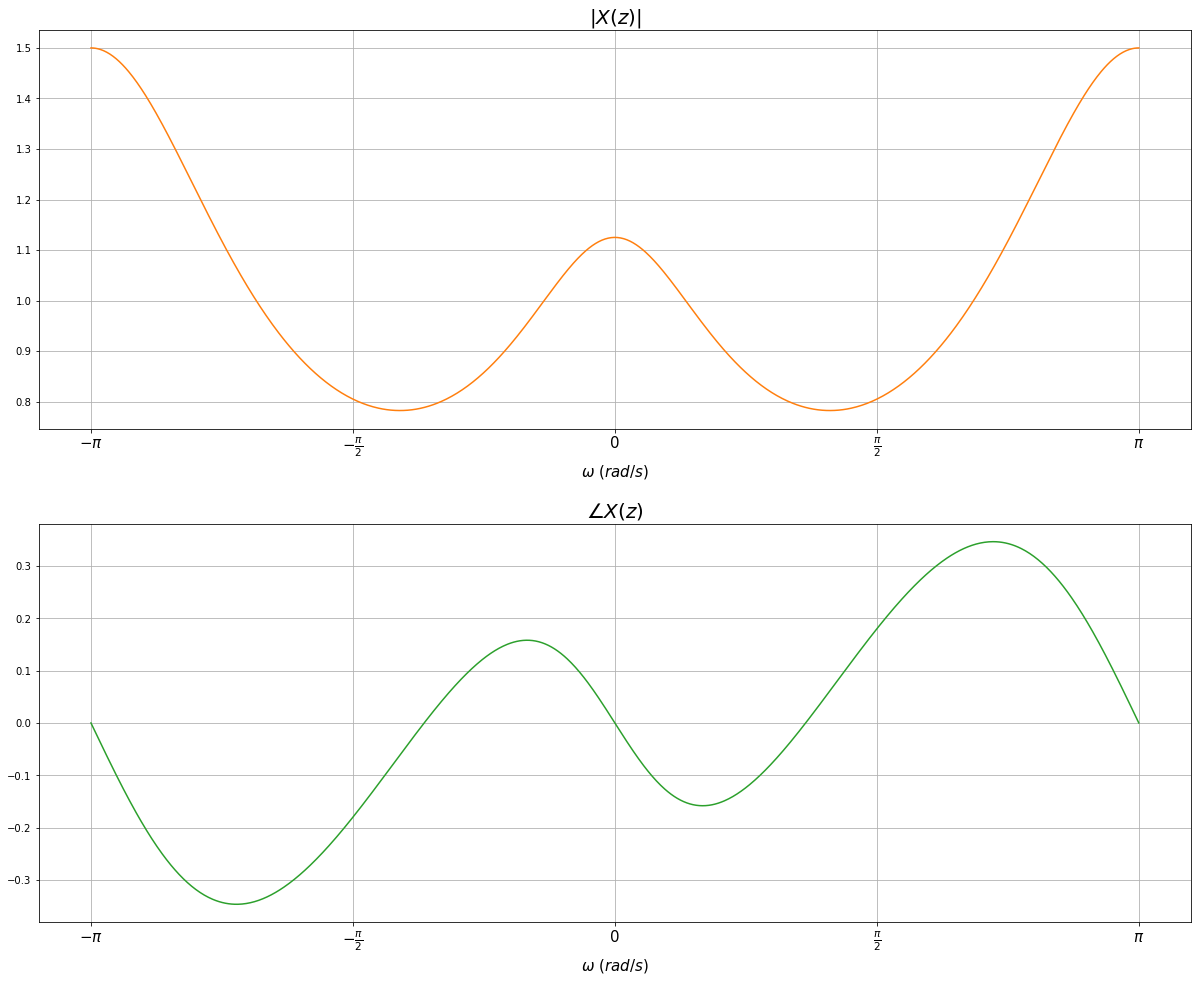

In [57]:
omg_8 = np.linspace(-1 * np.pi ,1 * np.pi , 1000)

z_8 = 18 * np.exp(3j * omg_8)/(18 * np.exp(3j * omg_8) + 3 * np.exp(2j*omg_8) - 4*np.exp(1j*omg_8) - 1)


z_8_mag = np.abs(z_8)
z_8_phs = list(map(lambda x: cmath.phase(x) , z_8))


plt.figure(figsize=(17,14))

plt.subplot(211)

plt.plot(omg_8 , z_8_mag, cl[1])
plt.title(r'$\|X(z)|$' , size= 20,weight = 'extra bold')
plt.xlabel('$\omega\ (rad/s)$' , size = 15 , weight = 'bold')
plt.grid()
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)


plt.subplot(212)

plt.plot(omg_8 , z_8_phs, cl[2])
plt.title(r'$\angle X(z)$' , size= 20,weight = 'extra bold')
plt.xlabel('$\omega\ (rad/s)$' , size = 15 , weight = 'bold')
plt.grid()
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)

plt.tight_layout(pad = 2)
plt.show()

## 8b)

In [55]:
num = [ 18]
den = [18,3,-4,-1]

[r,p,k] = residuez(num,den)

print('r :' , r)
print('Poles :' , p)
print('k : ' , k)

r : [0.24 0.4  0.36]
Poles : [-0.33333333 -0.33333333  0.5       ]
k :  []


## Partial fraction expansion:

## $$\frac{18z^{3}}{18z^{3}+3z^{2}-4z-1} = \frac{0.64z}{(z + \frac{1}{3})} + \frac{-0.133z}{(z + \frac{1}{3})^2} + \frac{0.36z}{(z - \frac{1}{2})}$$

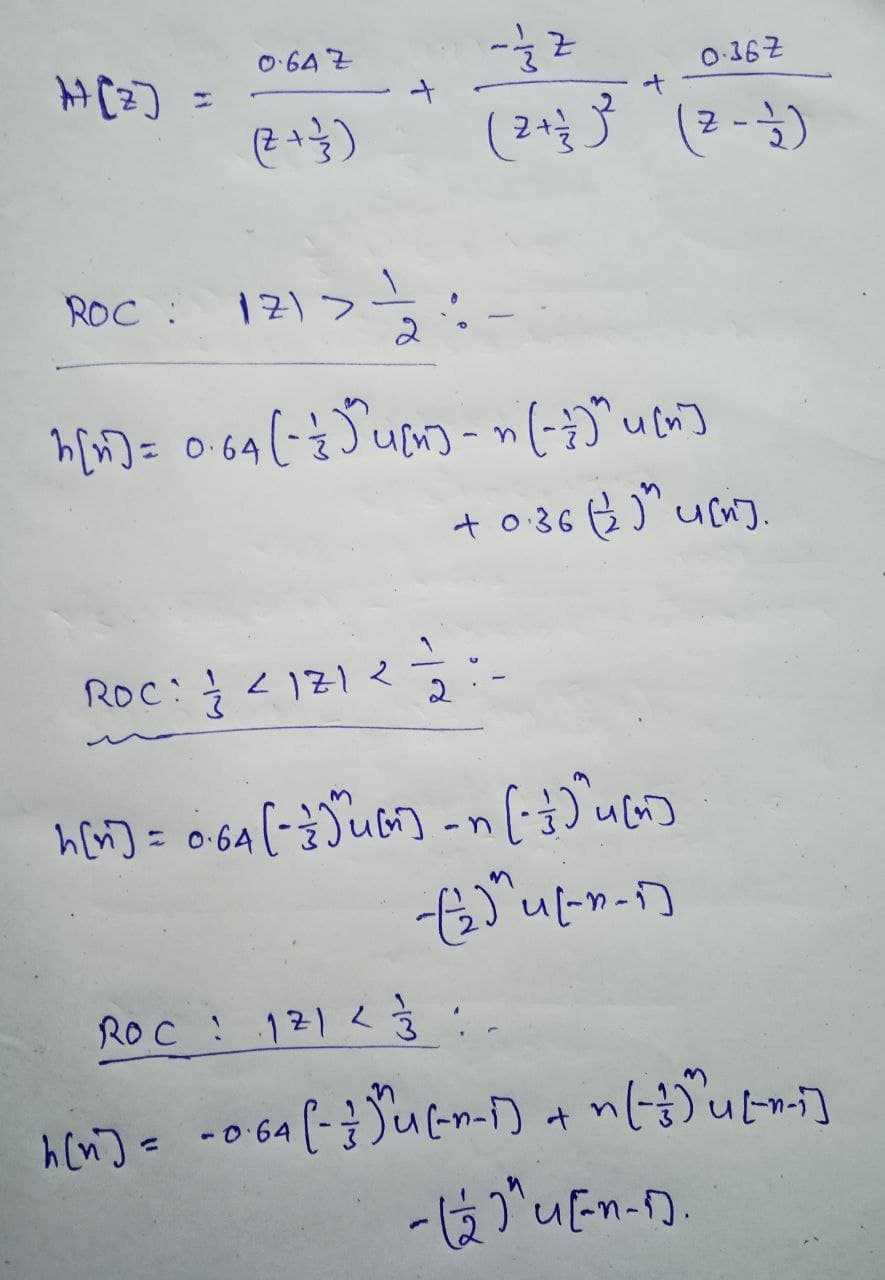

## 9a)

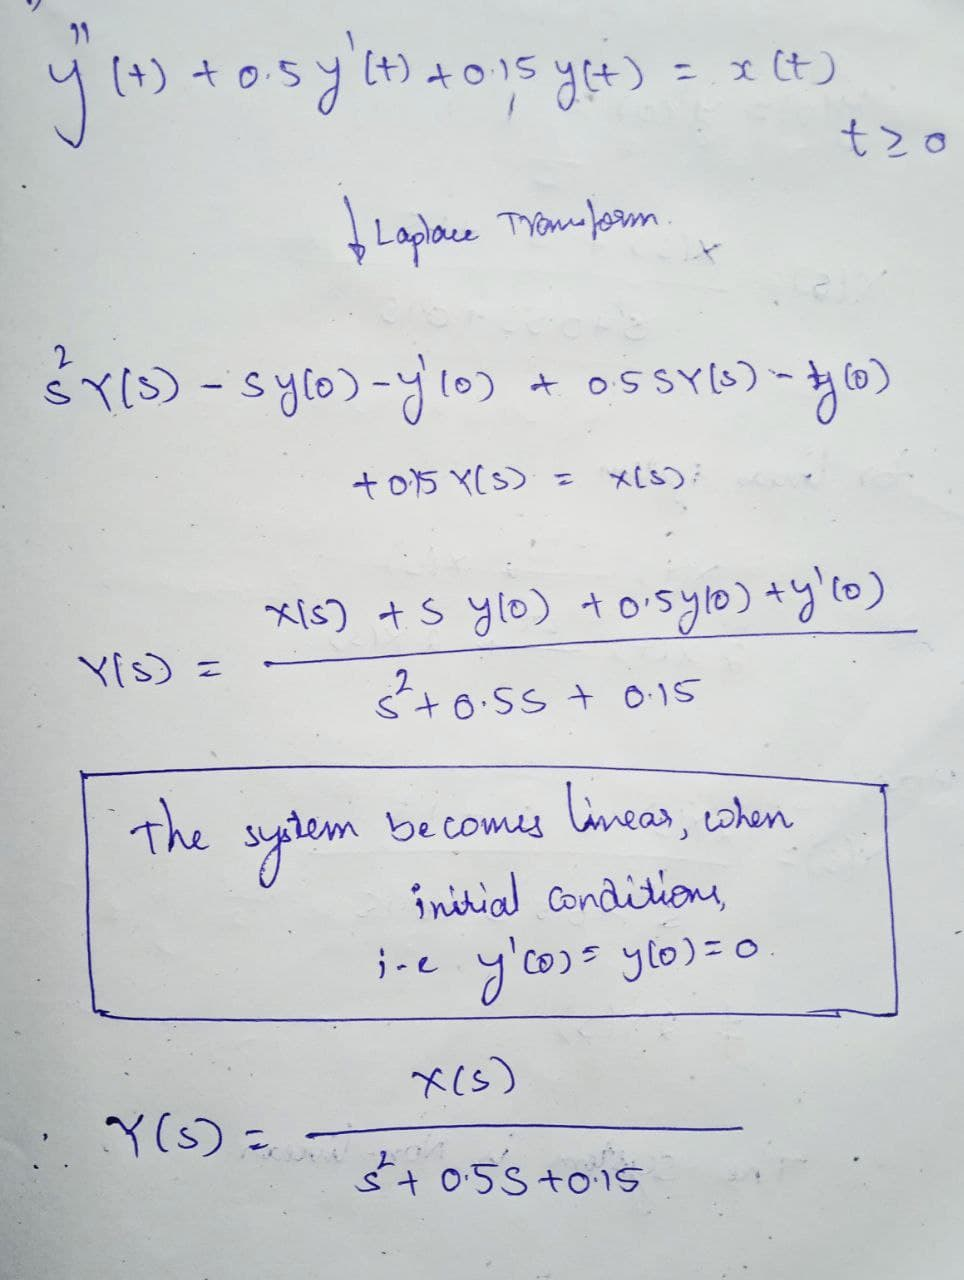

## 9b)

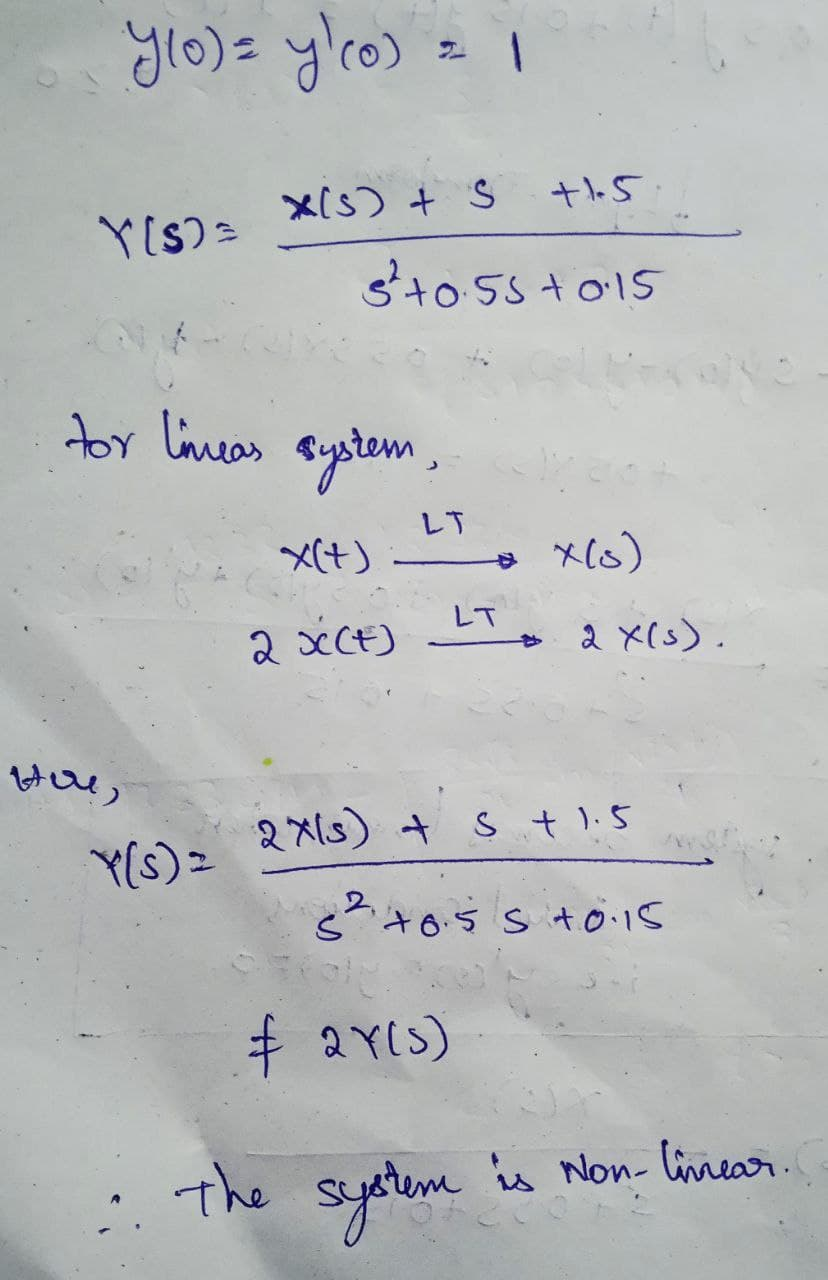

## 9c)

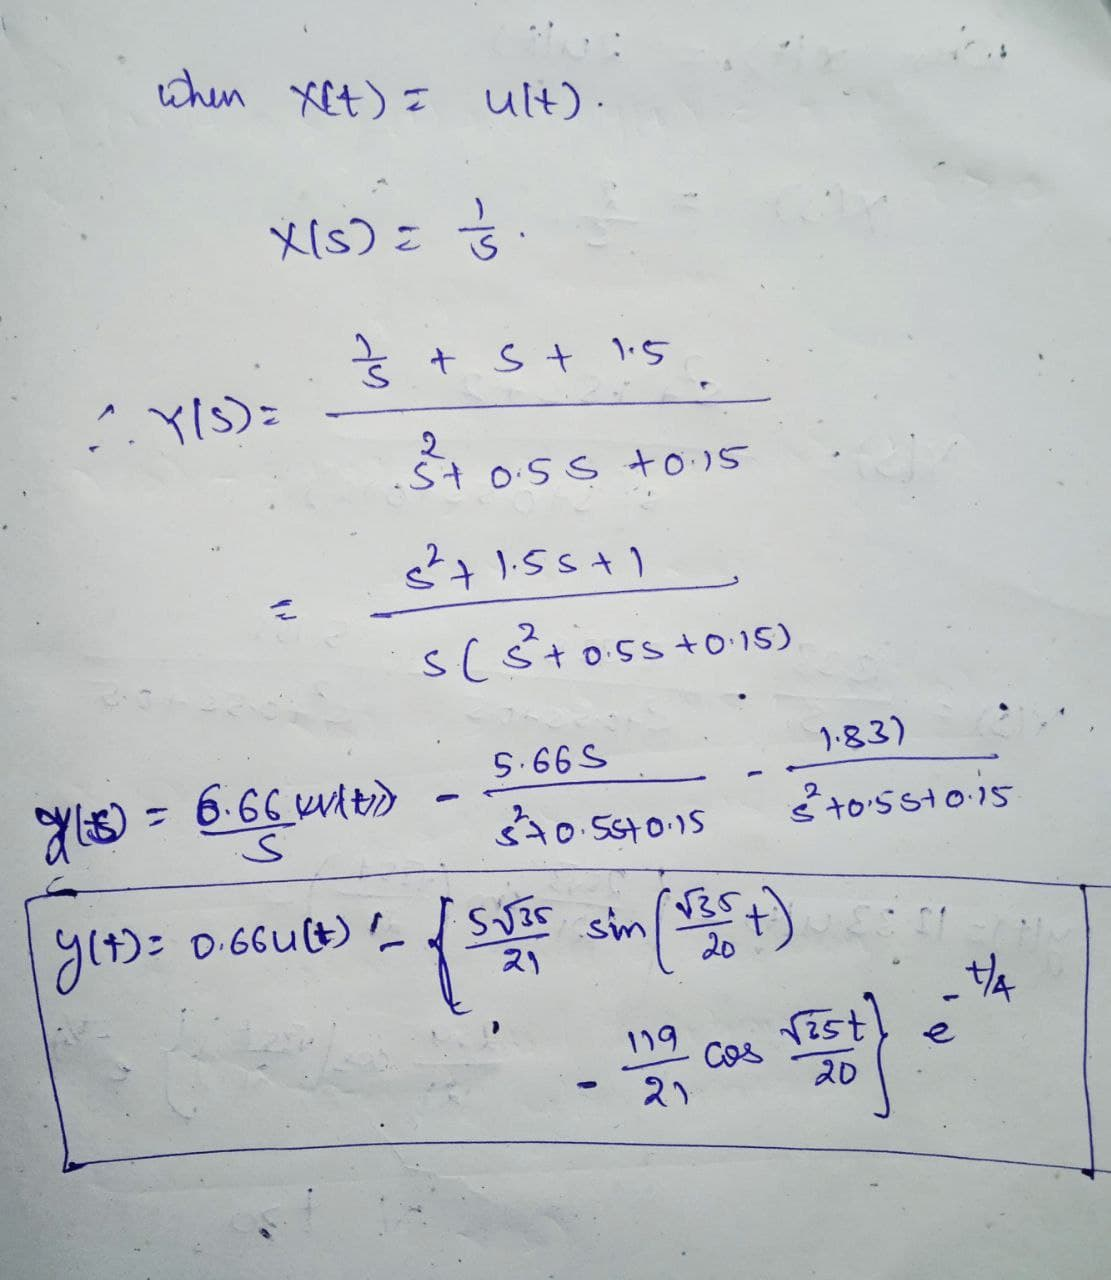

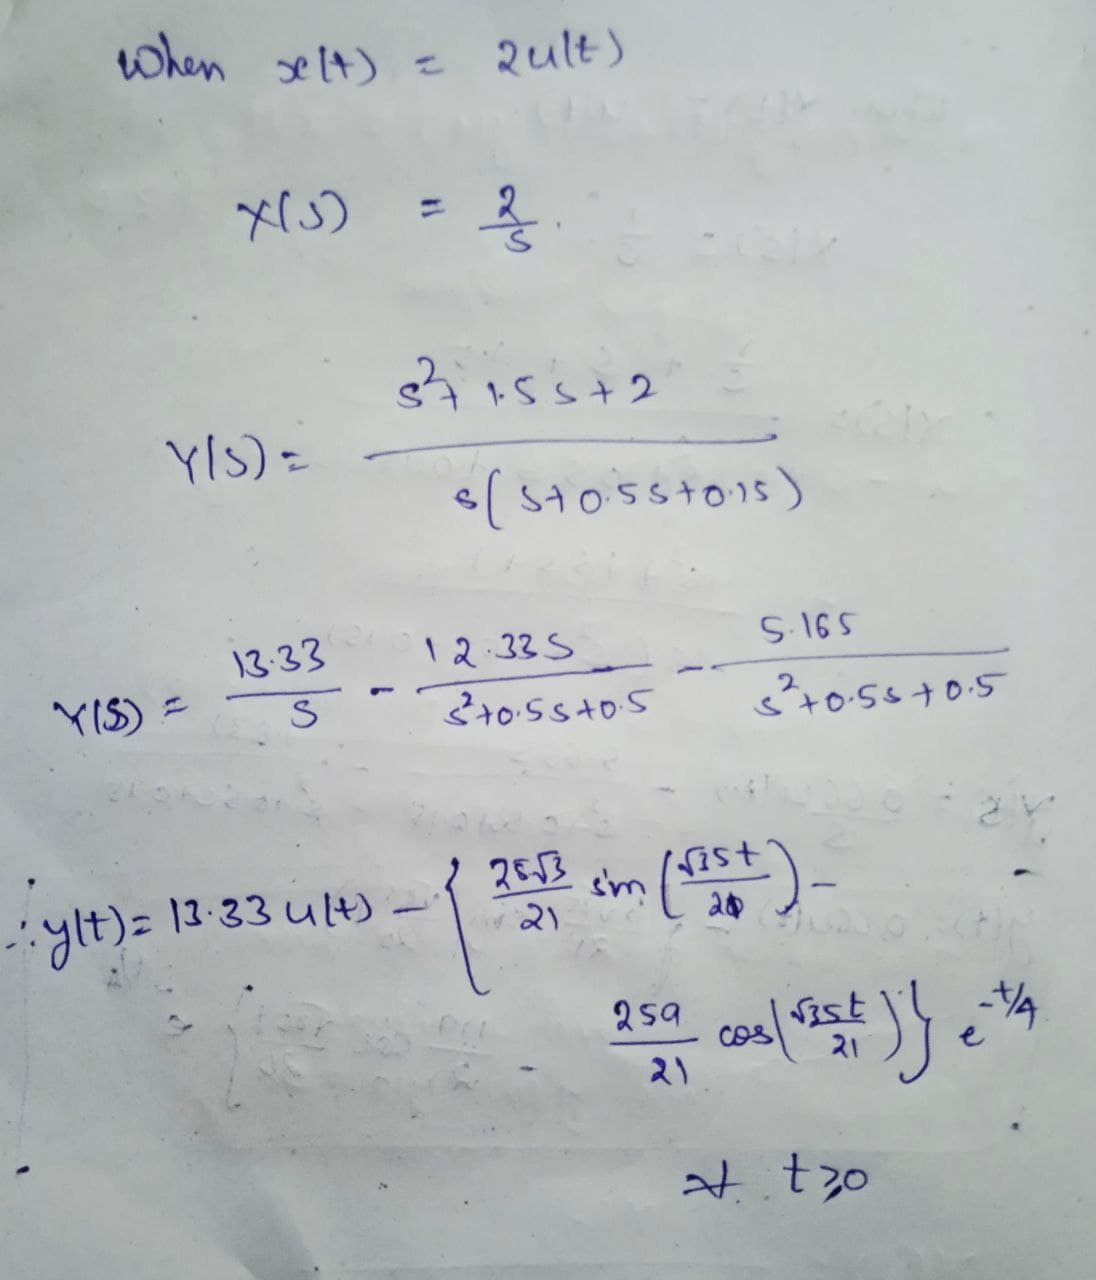

## 10)

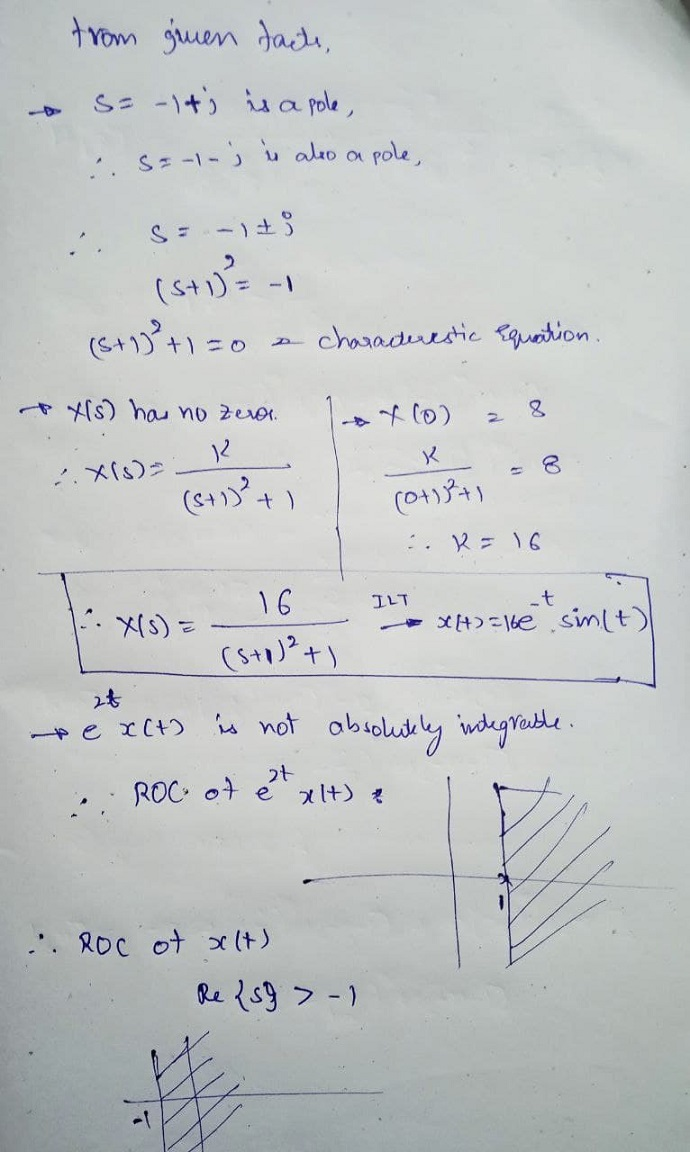

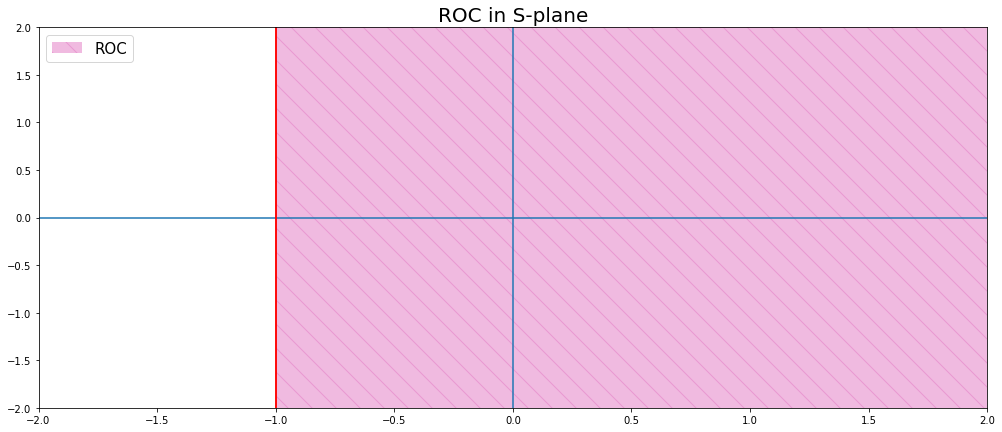

In [26]:
from scipy import signal, misc

z,p,k=signal.tf2zpk([0,0,16], [1,2,2])

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0,)
plt.axvline(0,)
plt.axvline(p[1],color='r',)
plt.axvline(p[0],color='r',)
plt.axvspan(-1 ,2,hatch = '\\', color = cl[6] , alpha = 0.5 , lw=0,label='ROC')
plt.title('ROC in S-plane',size=20)
plt.legend(prop = {'size':15})


plt.show()